In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd





  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=4db2f4452ac0ee1b615d479f0aa883b4b960621c90b4135ad8cf66b13b027e68
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


**2Answer.**I used different topics those are
  1.Vampires
  2.Trees and insted of wikipedia i tried to include encyclopedia but cannot find the functions related to encyclopedia.

In [ ]:
topic1 = 'Vampires'
topic2 = 'trees'

**1 Answer**I tried with different language and those are english and indonesia`

In [ ]:
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('id')
id1 = wikipedia.page(topic1).content
id2 = wikipedia.page(topic2).content


In [ ]:
def cleanup(txt):
  txt = txt.lower()  
  txt = re.sub('[^a-z]+', '', txt)
  return txt



eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
id1 = cleanup(id1)
id2 = cleanup(id2)


In [ ]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]

def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)





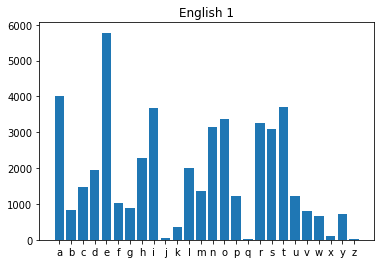

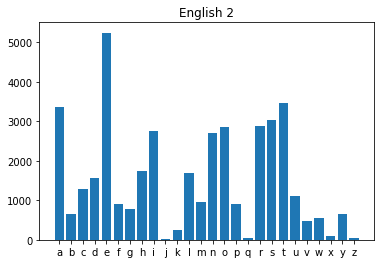

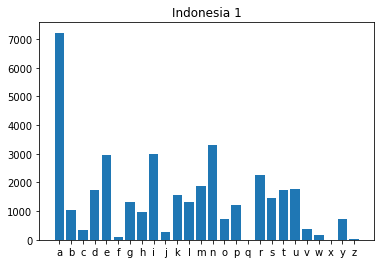

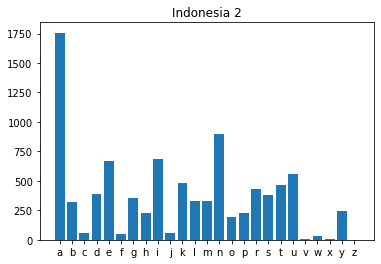

In [ ]:
#UNI-GRAM
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

unigram_id1 = Counter(ngrams(id1,1))
plothistogram(unigram_id1)
plt.title('Indonesia 1')
plt.show()
unigram_id2 = Counter(ngrams(id2,1))
plothistogram(unigram_id2)
plt.title('Indonesia 2')
plt.show()





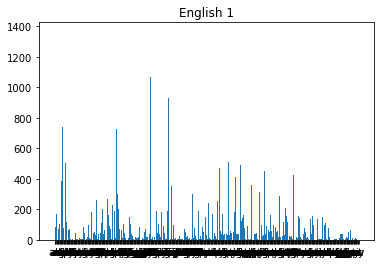

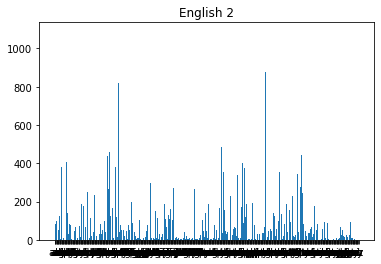

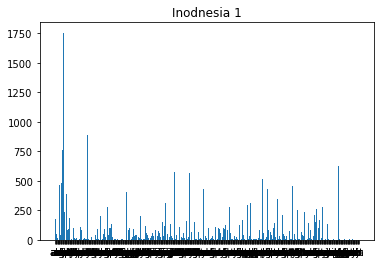

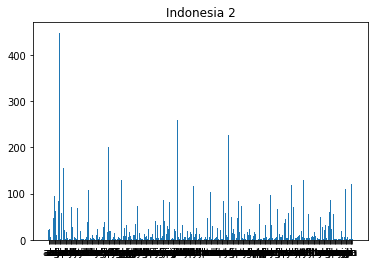

In [ ]:
#BI-GRAM
bigram_eng1 = Counter(ngrams(eng1,2))
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()
bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_id1 = Counter(ngrams(id1,2))
plothistogram(bigram_id1)
plt.title('Inodnesia 1')
plt.show()
bigram_id2 = Counter(ngrams(id2,2))
plothistogram(bigram_id2)
plt.title('Indonesia 2')
plt.show()





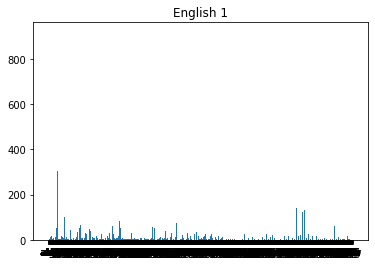

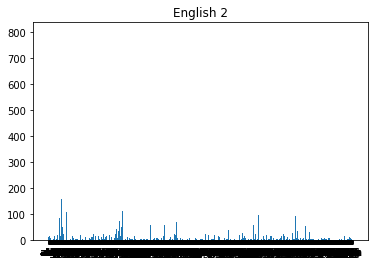

In [ ]:
#TRI-GRAM
trigram_eng1 = Counter(ngrams(eng1,3))
plothistogram(trigram_eng1)
plt.title('English 1')
plt.show()
trigram_eng2 = Counter(ngrams(eng2,3))
plothistogram(trigram_eng2)
plt.title('English 2')
plt.show()



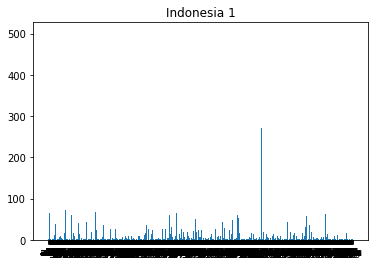

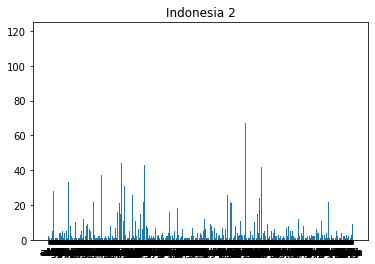

In [ ]:
trigram_id1 = Counter(ngrams(id1,3))
plothistogram(trigram_id1)
plt.title('Indonesia 1')
plt.show()
trigram_id2 = Counter(ngrams(id2,3))
plothistogram(trigram_id2)
plt.title('Indonesia 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

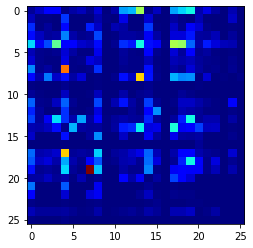

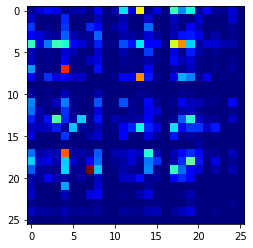

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)



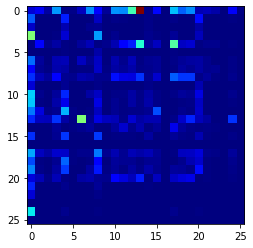

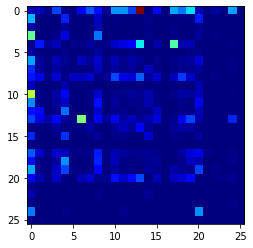

In [ ]:
biid1 = plotbihistogram(bigram_id1)
plt.show()
biid2 = plotbihistogram(bigram_id2)

In [ ]:
from IPython.core.debugger import set_trace
def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nIndonesia 1:')
ShowTopN(biid1)
print('\nIndonesia 2:')
ShowTopN(biid2)


English 1:
('t', 'h') : 1357.0
('h', 'e') : 1068.0
('r', 'e') : 937.0
('i', 'n') : 932.0
('e', 'r') : 753.0
('a', 'n') : 739.0
('e', 's') : 725.0
('e', 'd') : 634.0
('o', 'r') : 524.0
('n', 't') : 508.0

English 2:
('t', 'h') : 1082.0
('h', 'e') : 939.0
('r', 'e') : 875.0
('i', 'n') : 822.0
('e', 's') : 821.0
('a', 'n') : 705.0
('e', 'r') : 658.0
('s', 't') : 517.0
('n', 'd') : 483.0
('e', 'd') : 458.0

Indonesia 1:
('a', 'n') : 1755.0
('d', 'a') : 889.0
('n', 'g') : 885.0
('e', 'r') : 791.0
('a', 'm') : 758.0
('e', 'n') : 690.0
('y', 'a') : 627.0
('k', 'a') : 576.0
('l', 'a') : 568.0
('a', 'r') : 554.0

Indonesia 2:
('a', 'n') : 448.0
('k', 'a') : 259.0
('n', 'g') : 227.0
('d', 'a') : 212.0
('e', 'r') : 200.0
('e', 'n') : 162.0
('a', 't') : 155.0
('b', 'a') : 136.0
('a', 'r') : 130.0
('t', 'a') : 130.0


How can we use and visualize trigrams and higher n-grams?

**3 Answer.** higher n-grams enter whatever number you want in the place of n in the below code

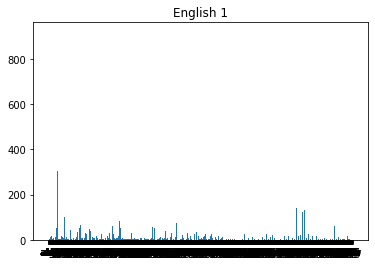

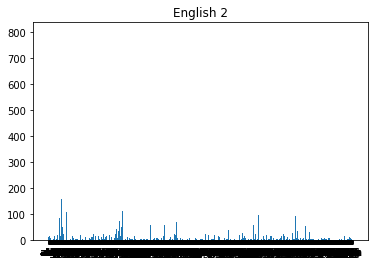

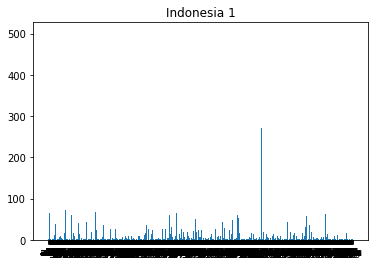

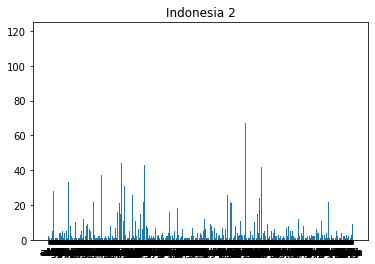

In [ ]:
n=4 #enter the number u want 


n_gram_eng1 = Counter(ngrams(eng1,n))
plothistogram(trigram_eng1)
plt.title('English 1')
plt.show()
n_gram_eng2 = Counter(ngrams(eng2,n))
plothistogram(trigram_eng2)
plt.title('English 2')
plt.show()


n_gram_id1 = Counter(ngrams(id1,n))
plothistogram(trigram_id1)
plt.title('Indonesia 1')
plt.show()
n_gram_id2 = Counter(ngrams(id2,n))
plothistogram(trigram_id2)
plt.title('Indonesia 2')
plt.show()

I tried of doing insted of wikipedia. i tried to do with encyclopedia.but i am not able do it cuz im am new to pyhton

# New section

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
no1 = train_X[train_y==9,:,:]
no0 = train_X[train_y==7,:,:]

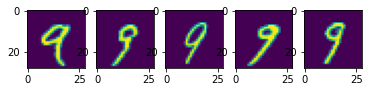

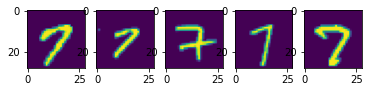

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

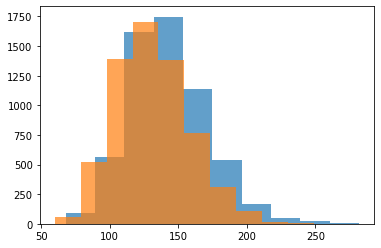

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




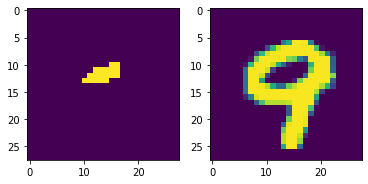

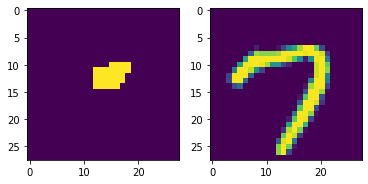

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()





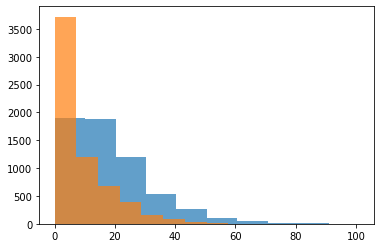

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


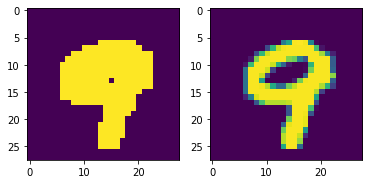

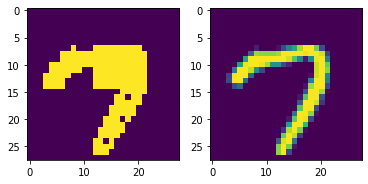

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

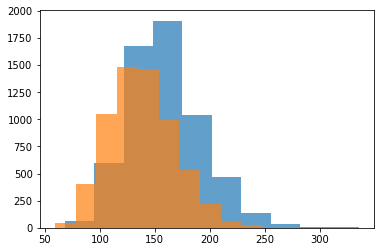

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

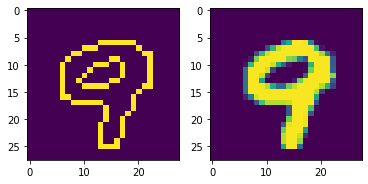

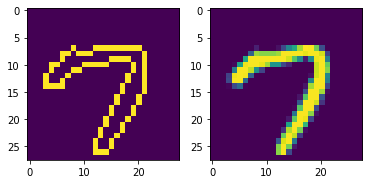

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

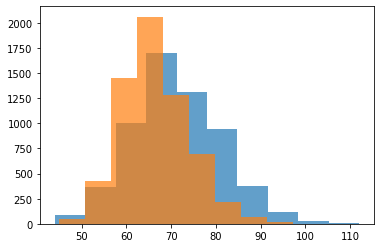

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

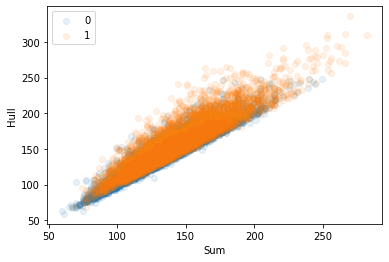

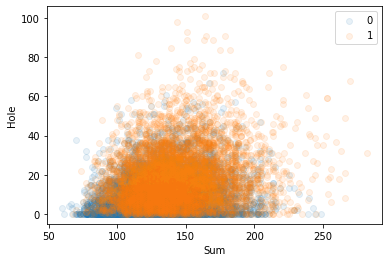

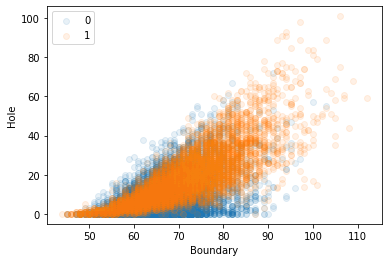

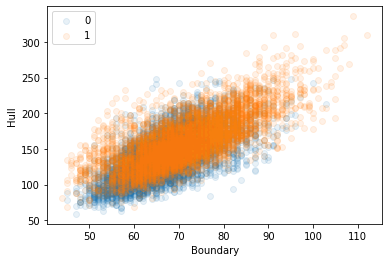

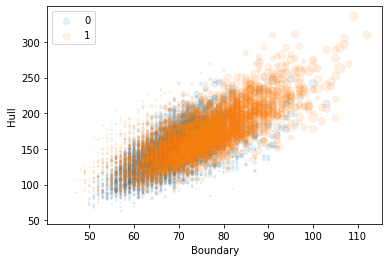

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

#Hull and boundary
plt.scatter(bound0, hull0, alpha=0.1)
plt.scatter(bound1, hull1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hull');
plt.legend(['0','1'])
plt.show()

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['hole', 'sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='hole', y='sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

**1.**I think the best combination is sum and hole is a good combination

**2**.we can visualize using both 2d and 3d but it will be clear in 3d

**3.**I have an idea but I know this is not crct in this lab..but I wanted to express it.
->what if we take all the  numbers 0 to 9 in the same ratio and compare both the boundaries of both or sum of pixels and we can recognize them.I know u may ask what if i write it in different dimensions.
I just have this thought and i wanted to share


**4.** No.I think this will not work for all numbers.Because I've tried in the above so you can clearly see that.This features are effective for 1 and 0  only

**5.**we can represent them in 3d i think so.I'm not sure about it.Though we try to represent these features cannot vary for numbers other than 0 and 1